<a href="https://colab.research.google.com/github/Forrestjohnson2000/6162-Seabreeze/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Buoy Data

In [75]:
import pandas as pd
import numpy as np

In [77]:
buoy = pd.read_csv('Buoy.csv', parse_dates = {"date" : ["#YY","MM","DD"]} )
buoy
buoy.drop(["mm"], axis=1)

,date,hh,WDIR,WSPD,GST,PRES,ATMP,WTMP
0,2020-01-01,0,257,5.3,7.1,1016.2,13.9,13.8
1,2020-01-01,1,255,5.9,8.4,1016.4,13.7,13.7
2,2020-01-01,2,254,7.4,9.2,1016.6,13.5,13.6
3,2020-01-01,3,257,7.8,10.1,1016.8,13.2,13.6
4,2020-01-01,4,260,7.8,10.1,1016.7,12.8,13.6
...,...,...,...,...,...,...,...,...
75762,2010-12-31,18,60,4.0,99.0,1022.8,9.6,999.0
75763,2010-12-31,20,70,4.0,99.0,1022.2,10.1,999.0
75764,2010-12-31,21,80,3.0,99.0,1022.2,10.4,999.0
75765,2010-12-31,22,80,3.0,99.0,1022.4,11.1,999.0


In [78]:
#Checking the datatypes of inported data, these seem to make sense
buoy.dtypes

date    datetime64[ns]
hh               int64
mm               int64
WDIR             int64
WSPD           float64
GST            float64
PRES           float64
ATMP           float64
WTMP           float64
dtype: object

In [79]:
buoy.describe()

,hh,mm,WDIR,WSPD,GST,PRES,ATMP,WTMP
count,75767.000000,75767.000000,75767.000000,75767.000000,75767.000000,75767.000000,75767.000000,75767.000000
mean,11.494846,4.478322,175.703670,5.568113,31.143432,2185.523770,41.736301,554.183938
std,6.920052,4.981954,118.410601,4.124480,40.339431,3021.123983,144.280182,486.641218
min,0.000000,0.000000,0.000000,0.000000,0.000000,991.900000,-5.900000,5.500000
25%,6.000000,0.000000,75.000000,3.600000,5.600000,1014.400000,14.500000,24.400000
50%,11.000000,8.000000,190.000000,5.100000,8.700000,1018.200000,21.200000,999.000000
75%,17.000000,8.000000,243.000000,7.000000,99.000000,1023.200000,26.900000,999.000000
max,23.000000,53.000000,999.000000,99.000000,99.000000,9999.000000,999.000000,999.000000


In [80]:
#replacing values with na as 99, 999, 9999 are missing data
buoy["WDIR"].replace({999.0:np.nan}, inplace=True)
buoy["GST"].replace({99.0:np.nan}, inplace=True)
buoy["PRES"].replace({9999.0:np.nan}, inplace=True)
buoy["ATMP"].replace({999.0:np.nan}, inplace=True)
buoy["WTMP"].replace({999.0:np.nan}, inplace=True)
buoy["WSPD"].replace({99.0:np.nan}, inplace=True)

In [81]:
#Checking our data to see current statistics per each variable that was skewed by the 99/999/9999 
buoy[["GST", "WDIR", "PRES", "ATMP", "WTMP", "WSPD"]].describe()

,GST,WDIR,PRES,ATMP,WTMP,WSPD
count,56064.000000,75296.000000,65913.000000,74088.000000,34490.000000,75680.000000
mean,7.296079,170.553695,1017.408303,20.042562,21.836225,5.460706
std,3.496994,99.208078,5.594077,7.141285,6.584634,2.642720
min,0.000000,0.000000,991.900000,-5.900000,5.500000,0.000000
25%,4.900000,74.000000,1013.900000,14.300000,15.400000,3.600000
50%,7.000000,190.000000,1017.300000,20.900000,23.200000,5.100000
75%,9.500000,240.000000,1020.800000,26.700000,28.300000,7.000000
max,40.700000,360.000000,1041.300000,33.700000,31.900000,30.300000


In [82]:
#We can see from this that there is significant data loss in some categories with WDIR, GST, PRES, ATMP, WTMP all have
#missing values, especially GST, PRES, and WTMP so we will need to handle that lost data
print(buoy.isnull().sum())
print(buoy.info())

date        0
hh          0
mm          0
WDIR      471
WSPD       87
GST     19703
PRES     9854
ATMP     1679
WTMP    41277
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75767 entries, 0 to 75766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    75767 non-null  datetime64[ns]
 1   hh      75767 non-null  int64         
 2   mm      75767 non-null  int64         
 3   WDIR    75296 non-null  float64       
 4   WSPD    75680 non-null  float64       
 5   GST     56064 non-null  float64       
 6   PRES    65913 non-null  float64       
 7   ATMP    74088 non-null  float64       
 8   WTMP    34490 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 5.2 MB
None


In [83]:
#Imputing the missing data
from sklearn.impute import SimpleImputer

In [86]:
#Imputing the mean into the missing data
buoy_mean = buoy.copy(deep=True)
mean_imputer = SimpleImputer(strategy="mean")
buoy_mean.iloc[:,3:] = mean_imputer.fit_transform(buoy_mean.iloc[:,3:])
buoy_mean[["GST", "WDIR", "PRES", "ATMP", "WTMP", "WSPD"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75767 entries, 0 to 75766
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GST     75767 non-null  float64
 1   WDIR    75767 non-null  float64
 2   PRES    75767 non-null  float64
 3   ATMP    75767 non-null  float64
 4   WTMP    75767 non-null  float64
 5   WSPD    75767 non-null  float64
dtypes: float64(6)
memory usage: 3.5 MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faa06ec87d0>,
      dtype=object)

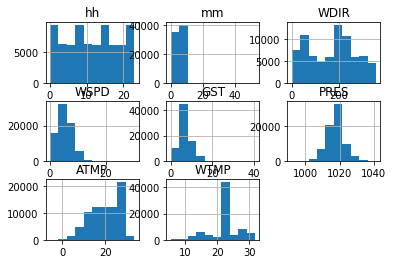

In [87]:
#Creating a histogram of the given data, we can ignore month, year, day, hour and minute distributions
#From the below graph we can see that windspeed and wind direction are not normally distributed, neither is pressure or Air temp
import matplotlib.pyplot as plt
buoy_mean.hist()

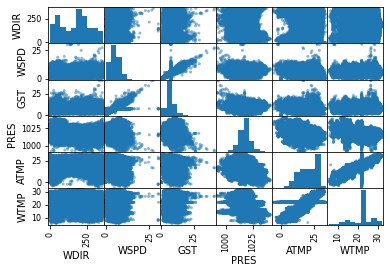

In [88]:
#Creating a scatter matrix of all the variables
#There does not look like many strong correlations except for between gust and wind speed which appear to be highly correlated
#This would make sense as high wind speeds create gusts so these two variables are positively correlated
from pandas.plotting import scatter_matrix
scatter_matrix(buoy_mean[["WDIR", "WSPD", "GST", "PRES", "ATMP", "WTMP"]])
plt.show()

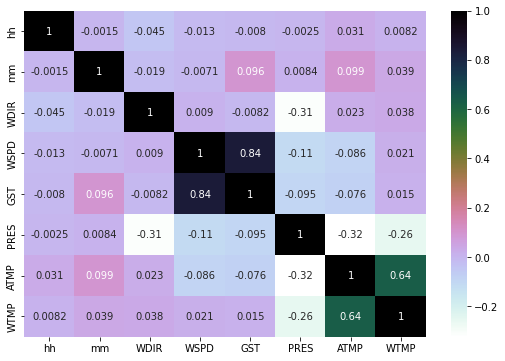

In [89]:
#Here we have a correlation heatmap
#What we take from this is that Windspeed and Gust are highly correlated at .84, Air Temp and Water Temp are fairly correlated
#at .64, and Month and Air Temp are somewhat positively correlated at .32
import seaborn as sns
plt.figure(figsize=(9,6))
sns.heatmap(buoy_mean.corr(),annot=True,cmap='cubehelix_r')
plt.show()

## Weather Station Data

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt

In [ ]:
stationHXD_data = pd.read_csv("HXD (1).csv")
stationSUT_data = pd.read_csv("SUT (1).csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
stationHXD_data.head(10)

,station,valid,tmpc,dwpc,relh,feel,drct,sped,mslp,p01i,gust_mph,skyc1,skyc2,skyl1
0,HXD,2013-01-01 00:55,8.0,7.0,93.40,46.4,0.0,0.0,NaN,0.00,NaN,CLR,NaN,NaN
1,HXD,2013-01-01 01:15,7.0,7.0,100.00,44.6,0.0,0.0,NaN,T,NaN,CLR,NaN,NaN
2,HXD,2013-01-01 01:35,6.0,6.0,100.00,42.8,0.0,0.0,NaN,T,NaN,CLR,NaN,NaN
3,HXD,2013-01-01 01:50,8.0,6.0,87.19,46.4,0.0,0.0,NaN,0.00,NaN,CLR,NaN,NaN
4,HXD,2013-01-01 01:55,6.0,6.0,100.00,42.8,0.0,0.0,NaN,T,NaN,CLR,NaN,NaN
5,HXD,2013-01-01 02:15,6.0,6.0,100.00,42.8,0.0,0.0,NaN,T,NaN,CLR,NaN,NaN
6,HXD,2013-01-01 02:35,6.0,6.0,100.00,42.8,0.0,0.0,NaN,T,NaN,SCT,NaN,10000.0
7,HXD,2013-01-01 02:55,7.0,7.0,100.00,44.6,0.0,0.0,NaN,T,NaN,OVC,NaN,10000.0
8,HXD,2013-01-01 03:15,7.0,7.0,100.00,44.6,0.0,0.0,NaN,T,NaN,OVC,NaN,10000.0
9,HXD,2013-01-01 03:35,8.0,8.0,100.00,46.4,0.0,0.0,NaN,T,NaN,OVC,NaN,11000.0


In [ ]:
stationHXD_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135944 entries, 0 to 135943
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   station   135944 non-null  object 
 1   valid     135944 non-null  object 
 2   tmpc      134699 non-null  float64
 3   dwpc      134647 non-null  float64
 4   relh      133674 non-null  float64
 5   feel      130683 non-null  float64
 6   drct      125708 non-null  float64
 7   sped      134429 non-null  float64
 8   mslp      0 non-null       float64
 9   p01i      135944 non-null  object 
 10  gust_mph  23520 non-null   float64
 11  skyc1     134623 non-null  object 
 12  skyc2     23410 non-null   object 
 13  skyl1     62189 non-null   float64
dtypes: float64(9), object(5)
memory usage: 14.5+ MB


In [ ]:
stationHXD_data.describe()

,tmpc,dwpc,relh,feel,drct,sped,mslp,gust_mph,skyl1
count,134699.000000,134647.000000,133674.000000,130683.000000,125708.000000,134429.000000,0.0,23520.000000,62189.000000
mean,19.399602,15.627404,80.810795,68.238138,135.170459,6.093709,NaN,19.263971,3338.989210
std,7.461715,8.446663,16.418637,16.425940,119.891639,5.074004,NaN,5.839471,3950.926284
min,-7.000000,-62.000000,1.040000,7.170000,0.000000,0.000000,NaN,11.500000,0.000000
25%,14.000000,10.000000,71.830000,57.200000,10.000000,3.450000,NaN,16.100000,1100.000000
50%,21.000000,18.000000,83.660000,69.800000,150.000000,5.750000,NaN,18.400000,2200.000000
75%,25.000000,23.000000,93.880000,78.800000,220.000000,9.200000,NaN,21.850000,4000.000000
max,52.000000,37.000000,100.000000,185.240000,360.000000,468.050000,NaN,217.350000,105500.000000


In [ ]:
stationSUT_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224922 entries, 0 to 224921
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   station   224922 non-null  object 
 1   valid     224922 non-null  object 
 2   tmpc      224403 non-null  float64
 3   dwpc      224403 non-null  float64
 4   relh      224258 non-null  float64
 5   feel      219509 non-null  float64
 6   drct      224895 non-null  float64
 7   sped      224895 non-null  float64
 8   p01i      224922 non-null  float64
 9   gust_mph  40505 non-null   float64
 10  skyc1     221449 non-null  object 
 11  skyc2     44803 non-null   object 
 12  skyl1     90100 non-null   float64
dtypes: float64(9), object(4)
memory usage: 22.3+ MB


In [ ]:
stationHXD_data.valid = pd.to_datetime(stationHXD_data.valid)
stationSUT_data.valid = pd.to_datetime(stationSUT_data.valid)

In [ ]:
stationSUT_data.head(10)

,station,valid,tmpc,dwpc,relh,feel,drct,sped,p01i,gust_mph,skyc1,skyc2,skyl1
0,SUT,2013-01-01 00:15:00,5.0,2.7,85.07,41.00,0.0,0.00,0.0,NaN,SCT,SCT,4000.0
1,SUT,2013-01-01 00:35:00,4.6,2.8,88.10,40.28,0.0,0.00,0.0,NaN,SCT,NaN,4700.0
2,SUT,2013-01-01 00:55:00,4.7,2.7,86.86,40.46,0.0,0.00,0.0,NaN,SCT,SCT,3900.0
3,SUT,2013-01-01 01:15:00,4.9,3.2,88.75,40.82,0.0,0.00,0.0,NaN,CLR,NaN,NaN
4,SUT,2013-01-01 01:35:00,5.8,3.6,85.76,42.44,0.0,0.00,0.0,NaN,CLR,NaN,NaN
5,SUT,2013-01-01 01:55:00,6.5,4.1,84.63,43.70,0.0,0.00,0.0,NaN,SCT,NaN,11000.0
6,SUT,2013-01-01 02:15:00,7.6,5.6,87.15,44.33,210.0,3.45,0.0,NaN,SCT,NaN,11000.0
7,SUT,2013-01-01 02:35:00,9.5,6.6,82.10,47.39,230.0,4.60,0.0,NaN,SCT,NaN,10000.0
8,SUT,2013-01-01 02:55:00,10.1,7.4,83.31,50.18,230.0,5.75,0.0,NaN,SCT,NaN,10000.0
9,SUT,2013-01-01 03:15:00,10.5,7.8,83.36,50.90,220.0,5.75,0.0,NaN,SCT,NaN,10000.0


In [ ]:
stationSUT_data.dtypes

station             object
valid       datetime64[ns]
tmpc               float64
dwpc               float64
relh               float64
feel               float64
drct               float64
sped               float64
p01i               float64
gust_mph           float64
skyc1               object
skyc2               object
skyl1              float64
dtype: object

Preprocessing

In [ ]:
#Dropping column with all null values
stationHXD_data = stationHXD_data.drop(labels = "mslp", axis = 1)
stationHXD_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135944 entries, 0 to 135943
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   station   135944 non-null  object        
 1   valid     135944 non-null  datetime64[ns]
 2   tmpc      134699 non-null  float64       
 3   dwpc      134647 non-null  float64       
 4   relh      133674 non-null  float64       
 5   feel      130683 non-null  float64       
 6   drct      125708 non-null  float64       
 7   sped      134429 non-null  float64       
 8   p01i      135944 non-null  object        
 9   gust_mph  23520 non-null   float64       
 10  skyc1     134623 non-null  object        
 11  skyc2     23410 non-null   object        
 12  skyl1     62189 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(4)
memory usage: 13.5+ MB


In [ ]:
stationHXD_data.isnull().sum()

proportion = stationHXD_data.isnull().sum()/len(stationHXD_data.index)
pct = round(proportion*100, 3)
print(pct)

station      0.000
valid        0.000
tmpc         0.916
dwpc         0.954
relh         1.670
feel         3.870
drct         7.530
sped         1.114
p01i         0.000
gust_mph    82.699
skyc1        0.972
skyc2       82.780
skyl1       54.254
dtype: float64


In [ ]:
#Drop the variables with na's over 50% of the data
stationHXD_data = stationHXD_data.drop(labels = ["gust_mph", "skyc2", "skyl1"], axis = 1)

stationHXD_data.head()

KeyError: ignored

In [ ]:
stationSUT_data.isnull().sum()

station          0
valid            0
tmpc           519
dwpc           519
relh           664
feel          5413
drct            27
sped            27
p01i             0
gust_mph    184417
skyc1         3473
skyc2       180119
skyl1       134822
dtype: int64

In [ ]:
proportion = stationSUT_data.isnull().sum()/len(stationSUT_data.index)
pct = round(proportion*100, 3)
print(pct)

station      0.000
valid        0.000
tmpc         0.231
dwpc         0.231
relh         0.295
feel         2.407
drct         0.012
sped         0.012
p01i         0.000
gust_mph    81.992
skyc1        1.544
skyc2       80.081
skyl1       59.942
dtype: float64


In [ ]:
#Drop variables with na's greater than 50% of the data
stationSUT_data = stationSUT_data.drop(labels = ["gust_mph", "skyc2", "skyl1"], axis = 1)

stationSUT_data.head()

,station,valid,tmpc,dwpc,relh,feel,drct,sped,p01i,skyc1
0,SUT,2013-01-01 00:15:00,5.0,2.7,85.07,41.00,0.0,0.0,0.0,SCT
1,SUT,2013-01-01 00:35:00,4.6,2.8,88.10,40.28,0.0,0.0,0.0,SCT
2,SUT,2013-01-01 00:55:00,4.7,2.7,86.86,40.46,0.0,0.0,0.0,SCT
3,SUT,2013-01-01 01:15:00,4.9,3.2,88.75,40.82,0.0,0.0,0.0,CLR
4,SUT,2013-01-01 01:35:00,5.8,3.6,85.76,42.44,0.0,0.0,0.0,CLR


In [ ]:
##Impute missing values of variables tmpc, dwpc, relh, feel, drct, and sped
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy="mean")
stationHXD_data.loc[:,["tmpc", "dwpc", "relh", "feel", "drct", "sped"]] = mean_imputer.fit_transform(stationHXD_data[["tmpc", "dwpc", "relh", "feel", "drct", "sped"]])
stationSUT_data.loc[:,["tmpc", "dwpc", "relh", "feel", "drct", "sped"]] = mean_imputer.fit_transform(stationSUT_data[["tmpc", "dwpc", "relh", "feel", "drct", "sped"]])
stationHXD_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135944 entries, 0 to 135943
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   station  135944 non-null  object 
 1   tmpc     135944 non-null  float64
 2   dwpc     135944 non-null  float64
 3   relh     135944 non-null  float64
 4   feel     135944 non-null  float64
 5   drct     135944 non-null  float64
 6   sped     135944 non-null  float64
 7   p01i     135944 non-null  object 
 8   skyc1    134623 non-null  object 
 9   hour     135944 non-null  int64  
 10  date     135944 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 11.4+ MB


In [ ]:
#Impute skyc1 using mode
mode_imputer = SimpleImputer(strategy = "most_frequent")
stationHXD_data.loc[:,["skyc1"]] = mode_imputer.fit_transform(stationHXD_data[["skyc1"]])
stationSUT_data.loc[:,["skyc1"]] = mode_imputer.fit_transform(stationSUT_data[["skyc1"]])
stationHXD_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135944 entries, 0 to 135943
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   station  135944 non-null  object 
 1   tmpc     135944 non-null  float64
 2   dwpc     135944 non-null  float64
 3   relh     135944 non-null  float64
 4   feel     135944 non-null  float64
 5   drct     135944 non-null  float64
 6   sped     135944 non-null  float64
 7   p01i     135944 non-null  object 
 8   skyc1    135944 non-null  object 
 9   hour     135944 non-null  int64  
 10  date     135944 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 11.4+ MB


In [92]:
#Convert Datetime column to multiple columns
stationHXD_data["hour"] = stationHXD_data.valid.dt.hour
stationSUT_data["hour"] = stationSUT_data.valid.dt.hour

stationHXD_data["date"] = stationHXD_data.valid.dt.date
stationSUT_data["date"] = stationSUT_data.valid.dt.date

stationHXD_data.head()
stationSUT_data.head()

AttributeError: ignored

In [101]:
stationHXD_data.date = pd.to_datetime(stationHXD_data.date)
stationSUT_data.date = pd.to_datetime(stationSUT_data.date)
stationHXD_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135944 entries, 0 to 135943
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   station  135944 non-null  object        
 1   tmpc     135944 non-null  float64       
 2   dwpc     135944 non-null  float64       
 3   relh     135944 non-null  float64       
 4   feel     135944 non-null  float64       
 5   drct     135944 non-null  float64       
 6   sped     135944 non-null  float64       
 7   p01i     135944 non-null  object        
 8   skyc1    135944 non-null  object        
 9   hour     135944 non-null  int64         
 10  date     135944 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(1), object(3)
memory usage: 11.4+ MB


In [ ]:
#Delete valid column as it is redundant
stationHXD_data = stationHXD_data.drop("valid", axis = 1)
stationSUT_data = stationSUT_data.drop("valid", axis = 1)

In [ ]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

In [ ]:
scatter_matrix(stationSUT_data)

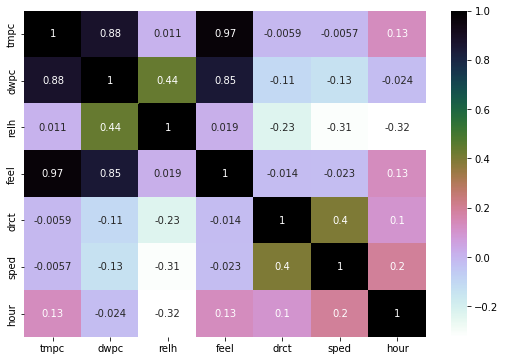

In [70]:
import seaborn as sns
plt.figure(figsize=(9,6))
sns.heatmap(stationHXD_data.corr(),annot=True,cmap='cubehelix_r')
plt.show()

## Old Station Data

In [ ]:
import re

In [ ]:
wilstation_data_selected = pd.read_csv("pm200p1p1_197501-202112updated.txt", index_col = False, sep = "\s", 
                              engine = 'python',
                              header = 0,
                              #low_memory = False, 
                              usecols = ["YEAR", "MO", "DY", "HR", "MN", "Hs","Tp","Dp"],
                              skipinitialspace = True,
                              skiprows = [1]) #parse_dates = [[0,1,2,3,4]])

In [ ]:
wilstation_data_selected.head(10)

,YEAR,MO,DY,HR,MN,Hs,Tp,Dp
0,2013,2,6,22,0,0.41,4.55,208.0
1,2013,2,6,22,30,0.40,4.76,199.0
2,2013,2,6,23,0,0.40,5.00,184.0
3,2013,2,6,23,30,0.41,11.11,140.0
4,2013,2,7,0,0,0.41,11.11,144.0
5,2013,2,7,0,30,0.41,11.76,139.0
6,2013,2,7,1,0,0.43,11.11,136.0
7,2013,2,7,1,30,0.41,10.53,137.0
8,2013,2,7,2,0,0.44,11.76,122.0
9,2013,2,7,2,30,0.45,11.11,141.0


In [ ]:
wilstation_data_selected.describe()

,YEAR,MO,DY,HR,MN,Hs,Tp,Dp
count,143835.000000,143835.000000,143835.000000,143835.000000,143835.000000,143469.000000,143469.000000,143045.000000
mean,2017.058748,6.502979,15.718427,11.500998,21.864852,1.004312,7.077190,154.798665
std,2.525683,3.470800,8.790811,6.923048,18.107736,0.443164,2.629369,51.906689
min,2013.000000,1.000000,1.000000,0.000000,0.000000,0.240000,1.920000,10.000000
25%,2015.000000,3.000000,8.000000,5.000000,0.000000,0.690000,5.000000,127.000000
50%,2017.000000,7.000000,16.000000,12.000000,30.000000,0.910000,6.670000,151.000000
75%,2019.000000,10.000000,23.000000,18.000000,30.000000,1.220000,8.330000,186.000000
max,2021.000000,12.000000,31.000000,23.000000,57.000000,5.590000,20.000000,360.000000


In [ ]:
wilstation_data_selected.isnull().sum()

YEAR      0
MO        0
DY        0
HR        0
MN        0
Hs      366
Tp      366
Dp      790
dtype: int64

In [ ]:
kilstation_data_selected = pd.read_csv("pm150p1p1_197501-202112updated.txt", index_col = False, sep = "\s", 
                              header = 0, engine = 'python', #low_memory = False, 
                              usecols = ["YEAR", "MO","DY","HR","MN","Hs", "Tp", "Dp"],
                              skipinitialspace = True,
                              skiprows = [1])

In [ ]:
kilstation_data_selected.head()

,YEAR,MO,DY,HR,MN,Hs,Tp,Dp
0,2008,5,7,15,22,0.57,10.53,106.0
1,2008,5,7,15,52,0.54,10.53,101.0
2,2008,5,7,16,22,0.54,9.88,108.0
3,2008,5,7,16,52,0.56,10.53,96.0
4,2008,5,7,17,22,0.56,6.67,132.0


In [ ]:
kilstation_data_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223770 entries, 0 to 223769
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   YEAR    223770 non-null  int64  
 1   MO      223770 non-null  int64  
 2   DY      223770 non-null  int64  
 3   HR      223770 non-null  int64  
 4   MN      223770 non-null  int64  
 5   Hs      223577 non-null  float64
 6   Tp      223577 non-null  float64
 7   Dp      223238 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 13.7 MB


In [ ]:
kilstation_data_selected.isnull().sum()

YEAR      0
MO        0
DY        0
HR        0
MN        0
Hs      193
Tp      193
Dp      532
dtype: int64

In [ ]:
kilstation_data.describe()

NameError: ignored

In [ ]:
#Imputing the missing data
from sklearn.impute import SimpleImputer

In [ ]:
#Imputing the mean into the missing data
station_mean = wilstation_data_selected.copy(deep=True)
mean_imputer = SimpleImputer(strategy="mean")
wilstation_data_selected.iloc[:,:] = mean_imputer.fit_transform(station_mean)
wilstation_data_selected[["Hs", "Tp", "Dp"]].describe()

,Hs,Tp,Dp
count,143835.000000,143835.000000,143835.000000
mean,1.004312,7.077190,154.798665
std,0.442600,2.626021,51.763945
min,0.240000,1.920000,10.000000
25%,0.690000,5.000000,127.000000
50%,0.910000,6.670000,151.000000
75%,1.220000,8.330000,185.000000
max,5.590000,20.000000,360.000000


In [ ]:
wilstation_data_selected.isnull().sum()

YEAR    0
MO      0
DY      0
HR      0
MN      0
Hs      0
Tp      0
Dp      0
dtype: int64

In [ ]:
#Imputing the mean into the missing data
station_mean = kilstation_data_selected.copy(deep=True)
mean_imputer = SimpleImputer(strategy="mean")
kilstation_data_selected.iloc[:,:] = mean_imputer.fit_transform(station_mean)
kilstation_data_selected[["Hs", "Tp", "Dp"]].describe()

,Hs,Tp,Dp
count,223770.000000,223770.000000,223770.000000
mean,0.929017,7.708949,129.973315
std,0.393606,2.739430,39.706551
min,0.230000,1.750000,11.000000
25%,0.660000,5.560000,105.000000
50%,0.840000,7.690000,126.000000
75%,1.110000,9.090000,154.000000
max,5.100000,22.220000,359.000000


In [ ]:
kilstation_data_selected.isnull().sum()

YEAR    0
MO      0
DY      0
HR      0
MN      0
Hs      0
Tp      0
Dp      0
dtype: int64

In [ ]:
kilstation_data_selected = kilstation_data_selected[kilstation_data_selected["YEAR"] >= 2013]

In [ ]:
kilstation_data_selected.to_csv("station150_updated.csv")
wilstation_data_selected.to_csv("station200_updated.csv")

In [ ]:
station150_updated = pd.read_csv("station150_updated.csv")
station200_updated = pd.read_csv("station200_updated.csv")

## Merging Datasets

In [102]:
#Save current changed documents to new csv files
stationHXD_updated = stationHXD_data.to_csv("stationHXD_updated.csv")
stationSUT_updated = stationSUT_data.to_csv("stationSUT_updated.csv")

In [103]:
stationHXD_updated = pd.read_csv("stationHXD_updated.csv")
stationSUT_updated = pd.read_csv("stationSUT_updated.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [111]:
station_data = stationHXD_updated.append(stationSUT_updated)

station_data.head(10)

,Unnamed: 0,station,tmpc,dwpc,relh,feel,drct,sped,p01i,skyc1,hour,date
0,0,HXD,8.0,7.0,93.40,46.4,0.0,0.0,0.00,CLR,0,2013-01-01
1,1,HXD,7.0,7.0,100.00,44.6,0.0,0.0,T,CLR,1,2013-01-01
2,2,HXD,6.0,6.0,100.00,42.8,0.0,0.0,T,CLR,1,2013-01-01
3,3,HXD,8.0,6.0,87.19,46.4,0.0,0.0,0.00,CLR,1,2013-01-01
4,4,HXD,6.0,6.0,100.00,42.8,0.0,0.0,T,CLR,1,2013-01-01
5,5,HXD,6.0,6.0,100.00,42.8,0.0,0.0,T,CLR,2,2013-01-01
6,6,HXD,6.0,6.0,100.00,42.8,0.0,0.0,T,SCT,2,2013-01-01
7,7,HXD,7.0,7.0,100.00,44.6,0.0,0.0,T,OVC,2,2013-01-01
8,8,HXD,7.0,7.0,100.00,44.6,0.0,0.0,T,OVC,3,2013-01-01
9,9,HXD,8.0,8.0,100.00,46.4,0.0,0.0,T,OVC,3,2013-01-01


In [112]:
station_data = station_data.drop("Unnamed: 0", axis = 1)
station_data = station_data.reindex(columns = ["date", "hour", "station",	"tmpc",	"dwpc",	"relh",	"feel",	"drct",	"sped",	"p01i",	"skyc1"])
station_data.head()

,date,hour,station,tmpc,dwpc,relh,feel,drct,sped,p01i,skyc1
0,2013-01-01,0,HXD,8.0,7.0,93.40,46.4,0.0,0.0,0.00,CLR
1,2013-01-01,1,HXD,7.0,7.0,100.00,44.6,0.0,0.0,T,CLR
2,2013-01-01,1,HXD,6.0,6.0,100.00,42.8,0.0,0.0,T,CLR
3,2013-01-01,1,HXD,8.0,6.0,87.19,46.4,0.0,0.0,0.00,CLR
4,2013-01-01,1,HXD,6.0,6.0,100.00,42.8,0.0,0.0,T,CLR


In [113]:
station_data.date = pd.to_datetime(station_data.date)

In [110]:
pd.DataFrame(station_data)

,date
0,2013-01-01
1,2013-01-01
2,2013-01-01
3,2013-01-01
4,2013-01-01
...,...
224917,2021-10-28
224918,2021-10-28
224919,2021-10-28
224920,2021-10-28


In [114]:
merged_data = station_data.merge(buoy_mean, how = "inner", left_on = ["date", "hour"], 
                                 right_on = ["date","hh"], left_index = True)

merged_data.head()

,date,hour,station,tmpc,dwpc,relh,feel,drct,sped,p01i,skyc1,hh,mm,WDIR,WSPD,GST,PRES,ATMP,WTMP
53810,2013-01-01,0,HXD,8.0,7.0,93.40,46.40,0.0,0.0,0.00,CLR,0,0,120.0,2.0,7.296079,1017.408303,11.0,21.836225
53810,2013-01-01,0,SUT,5.0,2.7,85.07,41.00,0.0,0.0,0,SCT,0,0,120.0,2.0,7.296079,1017.408303,11.0,21.836225
53810,2013-01-01,0,SUT,4.6,2.8,88.10,40.28,0.0,0.0,0,SCT,0,0,120.0,2.0,7.296079,1017.408303,11.0,21.836225
53810,2013-01-01,0,SUT,4.7,2.7,86.86,40.46,0.0,0.0,0,SCT,0,0,120.0,2.0,7.296079,1017.408303,11.0,21.836225
53811,2013-01-01,1,HXD,7.0,7.0,100.00,44.60,0.0,0.0,T,CLR,1,0,140.0,1.0,7.296079,1017.408303,11.0,21.836225


In [119]:
#merged_data = merged_data.drop(labels = ["hh", "mm"], axis = 1)

#merged_data.reset_index()
merged_data.head(15)

,date,hour,station,tmpc,dwpc,relh,feel,drct,sped,p01i,skyc1,WDIR,WSPD,GST,PRES,ATMP,WTMP
53810,2013-01-01,0,HXD,8.0,7.0,93.40,46.40,0.0,0.00,0.00,CLR,120.0,2.0,7.296079,1017.408303,11.0,21.836225
53810,2013-01-01,0,SUT,5.0,2.7,85.07,41.00,0.0,0.00,0,SCT,120.0,2.0,7.296079,1017.408303,11.0,21.836225
53810,2013-01-01,0,SUT,4.6,2.8,88.10,40.28,0.0,0.00,0,SCT,120.0,2.0,7.296079,1017.408303,11.0,21.836225
53810,2013-01-01,0,SUT,4.7,2.7,86.86,40.46,0.0,0.00,0,SCT,120.0,2.0,7.296079,1017.408303,11.0,21.836225
53811,2013-01-01,1,HXD,7.0,7.0,100.00,44.60,0.0,0.00,T,CLR,140.0,1.0,7.296079,1017.408303,11.0,21.836225
53811,2013-01-01,1,HXD,6.0,6.0,100.00,42.80,0.0,0.00,T,CLR,140.0,1.0,7.296079,1017.408303,11.0,21.836225
53811,2013-01-01,1,HXD,8.0,6.0,87.19,46.40,0.0,0.00,0.00,CLR,140.0,1.0,7.296079,1017.408303,11.0,21.836225
53811,2013-01-01,1,HXD,6.0,6.0,100.00,42.80,0.0,0.00,T,CLR,140.0,1.0,7.296079,1017.408303,11.0,21.836225
53811,2013-01-01,1,SUT,4.9,3.2,88.75,40.82,0.0,0.00,0,CLR,140.0,1.0,7.296079,1017.408303,11.0,21.836225
53811,2013-01-01,1,SUT,5.8,3.6,85.76,42.44,0.0,0.00,0,CLR,140.0,1.0,7.296079,1017.408303,11.0,21.836225


In [122]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276824 entries, 53810 to 8171
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   date     276824 non-null  datetime64[ns]
 1   hour     276824 non-null  int64         
 2   station  276824 non-null  object        
 3   tmpc     276824 non-null  float64       
 4   dwpc     276824 non-null  float64       
 5   relh     276824 non-null  float64       
 6   feel     276824 non-null  float64       
 7   drct     276824 non-null  float64       
 8   sped     276824 non-null  float64       
 9   p01i     276824 non-null  object        
 10  skyc1    276824 non-null  object        
 11  WDIR     276824 non-null  float64       
 12  WSPD     276824 non-null  float64       
 13  GST      276824 non-null  float64       
 14  PRES     276824 non-null  float64       
 15  ATMP     276824 non-null  float64       
 16  WTMP     276824 non-null  float64       
dtypes: datet

In [116]:
merged_data.to_csv("merged_data.csv")